In [1]:
# import pandas library for reading data and processing it
# import numpy for numeric data processing
# import matplotlib library for drawing plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the csv file into a dataframe

csv_df = pd.read_csv('United_States_Conditions_contributing_to_deaths_involving_COVID-19_by_age_group_and_state.csv')

In [3]:
## List out the column names present in the csv

csv_df.columns

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

In [4]:
## display the initial part of the data rows in the dataframe

csv_df.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,02/14/2021,01/04/2020,02/13/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,273.0,281.0,NaN
1,02/14/2021,01/04/2020,02/13/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1293.0,1315.0,NaN
2,02/14/2021,01/04/2020,02/13/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,3496.0,3566.0,NaN
3,02/14/2021,01/04/2020,02/13/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,10380.0,10643.0,NaN
4,02/14/2021,01/04/2020,02/13/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,26578.0,27202.0,NaN


# Format Data into more readable format by selecting a subset of columns.
## This will ensure that we keep only the required data for further data preparation / visualizations

In [5]:
## list out the columns we need to use in the further part of the project and it will be used to create subset dataframe.
## these names will be used to further renamed to the new column names

## 1) We are Not looking to use the Dates columns named : 'Data as of', 'Start Week' and 'End Week', since we will be using
## cumulative count values for further data preparation processsing and visualizations
## 2) ICD10_codes field can be ignored since we will not be using for analysis
## 3) Flag field can be ignored since it consists of description whether indicating one or more data cells in the row
## consist of counts between 1 - 9 and have been left blank. So, this can be ommitted
## 4) Number of Mentions columns appears to be redundant in terms of count values. It can be ommitted since we are focusing
## on the counts values
## 5) We will be retaining below 5 columns in the analysis going forward.
## ==> State columns consists of 'US' - national level info as well as 'State' level information.
## ==> Condition Group and Condition columns will be used for further analysis, related to COVID-19 health issues and deaths
## ==> Age Group will be used currently, to ensure we are able to consolidate the death counts data at a later stage, at
##     'US' national level and State level
## ==> COVID-19 related deaths counts columns will be used going forward


cols = ['State', 'Condition Group', 'Condition', 'Age Group', 'COVID-19 Deaths']

In [6]:
## create a subset dataframe using the selected few columns in the list above
## This will ensure we have well formatted data and the minimal amount of required data columns are carried forward

temp_df = csv_df[cols]

In [7]:
## display few records from the dataframe

temp_df.head()

,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,US,Respiratory diseases,Influenza and pneumonia,0-24,273.0
1,US,Respiratory diseases,Influenza and pneumonia,25-34,1293.0
2,US,Respiratory diseases,Influenza and pneumonia,35-44,3496.0
3,US,Respiratory diseases,Influenza and pneumonia,45-54,10380.0
4,US,Respiratory diseases,Influenza and pneumonia,55-64,26578.0


# Replace Headers / Column names with shorter meaningful names

In [8]:
## reference source : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

## rename the column names to be more convenient and shorter but meaningful names

temp_df.rename(columns={'State': "CTRY_State", 'Condition Group': 'Health_Cond_Grp', 'Condition': 'Health_Cond', 'Age Group': 'Age_Grp', 'COVID-19 Deaths': 'COVID_Deaths'}, inplace=True)

# Identify presence of bad data / NaN values and replace the values with default

In [9]:
## we will check if there are any null values present in the columns which we have selected for further analysis

print(f'Number of Null values in CTRY_State is : {temp_df.CTRY_State.isnull().sum()}')
print(f'Number of Null values in Health_Cond_Grp is : {temp_df.Health_Cond_Grp.isnull().sum()}')
print(f'Number of Null values in Health_Cond is : {temp_df.Health_Cond.isnull().sum()}')
print(f'Number of Null values in Age_Grp is : {temp_df.Age_Grp.isnull().sum()}')
print(f'Number of Null values in COVID_Deaths is : {temp_df.COVID_Deaths.isnull().sum()}')

Number of Null values in CTRY_State is : 0
Number of Null values in Health_Cond_Grp is : 0
Number of Null values in Health_Cond is : 0
Number of Null values in Age_Grp is : 0
Number of Null values in COVID_Deaths is : 2580


#### Looking at above, we can notice that COVID_Deaths columns appears to have NaN values.

#### The reason for NaN / missing values is the counts values are between 1 - 9. This appears to be the case for State level data only.

#### So, We may have to default these values to count as 1, since we are not sure of the exact counts.

In [10]:
## Replace NaN values in COVID Deaths counts columns with Default value of 1.

temp_df['COVID_Deaths'] = temp_df['COVID_Deaths'].fillna(1)

# Find if any duplicate rows present in the data frame

In [11]:
## Checking if there are any duplicate values within the dataframe, at a row level

duplicate_rows_df = temp_df[temp_df.duplicated()]

In [12]:
## Checking how many duplicate rows found

duplicate_rows_df.shape

(0, 5)

### It appears that there are no duplicate rows

# Remove blanks / spaces around text column values

In [13]:
## Data cleaning step to ensure there are no leading or training spaces around Text value columns 
## CTRY_State, Health_Cond_Grp and Health_Cond are those columns with Text values.

temp_df['CTRY_State'] = temp_df['CTRY_State'].str.strip()
temp_df['Health_Cond_Grp'] = temp_df['Health_Cond_Grp'].str.strip()
temp_df['Health_Cond'] = temp_df['Health_Cond'].str.strip()

# Performing following steps for creating subset dataframes.
## This will help in segregating the national level data and state level data

In [14]:
## further filter out only the US : National level data from this csv data source, 
## since we will be using it for further analysis

df_national = temp_df[temp_df.CTRY_State == 'US']
df_states   = temp_df[temp_df.CTRY_State != 'US']

In [15]:
## check the size / shape of the dataframe created

print(f'Size of the national data is: {df_national.shape}')
print(f'Size of the state data is: {df_states.shape}')

Size of the national data is: (230, 5)
Size of the state data is: (12190, 5)


In [16]:
## display the initial data of the new subset and filtered dataframe

df_national.head()

,CTRY_State,Health_Cond_Grp,Health_Cond,Age_Grp,COVID_Deaths
0,US,Respiratory diseases,Influenza and pneumonia,0-24,273.0
1,US,Respiratory diseases,Influenza and pneumonia,25-34,1293.0
2,US,Respiratory diseases,Influenza and pneumonia,35-44,3496.0
3,US,Respiratory diseases,Influenza and pneumonia,45-54,10380.0
4,US,Respiratory diseases,Influenza and pneumonia,55-64,26578.0


In [17]:
## display the initial data of the new subset and filtered dataframe

df_states.head()

,CTRY_State,Health_Cond_Grp,Health_Cond,Age_Grp,COVID_Deaths
230,AL,Respiratory diseases,Influenza and pneumonia,0-24,1.0
231,AL,Respiratory diseases,Influenza and pneumonia,25-34,24.0
232,AL,Respiratory diseases,Influenza and pneumonia,35-44,47.0
233,AL,Respiratory diseases,Influenza and pneumonia,45-54,146.0
234,AL,Respiratory diseases,Influenza and pneumonia,55-64,345.0


In [18]:
## prepare filtered out subset COVID-19 data frames for national and states level.
## looking at the original csv file, 'COVID-19' is the value present in Health Condition Group column. So, using that value
## for filter condition

covid_df_national = df_national[df_national.Health_Cond_Grp == 'COVID-19']
covid_df_states   = df_states[df_states.Health_Cond_Grp == 'COVID-19']

In [19]:
## check the size / shape of the dataframe created

print(f'Size of the national data is: {covid_df_national.shape}')
print(f'Size of the state data is: {covid_df_states.shape}')

Size of the national data is: (10, 5)
Size of the state data is: (530, 5)


In [20]:
## display the initial data of the new subset and filtered dataframe

covid_df_national.head()

,CTRY_State,Health_Cond_Grp,Health_Cond,Age_Grp,COVID_Deaths
220,US,COVID-19,COVID-19,0-24,783.0
221,US,COVID-19,COVID-19,25-34,2891.0
222,US,COVID-19,COVID-19,35-44,7617.0
223,US,COVID-19,COVID-19,45-54,21007.0
224,US,COVID-19,COVID-19,55-64,53477.0


In [21]:
covid_df_states.head()

,CTRY_State,Health_Cond_Grp,Health_Cond,Age_Grp,COVID_Deaths
450,AL,COVID-19,COVID-19,0-24,10.0
451,AL,COVID-19,COVID-19,25-34,53.0
452,AL,COVID-19,COVID-19,35-44,158.0
453,AL,COVID-19,COVID-19,45-54,470.0
454,AL,COVID-19,COVID-19,55-64,1158.0


# Perform Group by operation and find out the counts column aggregations

## This step is another data cleaning / preparation step to move closer to the visualizations and ensures that Aggregated data provided within the csv file is matching the information provided.

In [22]:
### calculate national and state level numbers from respective dataframes : Use groupby state and add up COVID_Deaths.
## Ensure to ommit the 'All Ages' records, since those are already the summarized records

covid_df_national_agg = covid_df_national[covid_df_national.Age_Grp != 'All Ages'].groupby(['CTRY_State']).sum()
covid_df_states_agg = covid_df_states[covid_df_states.Age_Grp != 'All Ages'].groupby(['CTRY_State']).sum()

In [23]:
## Display the national level data aggregations performed

covid_df_national_agg

,COVID_Deaths
CTRY_State,
US,455247.0


In [24]:
## display the available 'All Ages' counts provided in csv

covid_df_national[covid_df_national.Age_Grp == 'All Ages']

,CTRY_State,Health_Cond_Grp,Health_Cond,Age_Grp,COVID_Deaths
229,US,COVID-19,COVID-19,All Ages,455247.0


### After performing the aggregations of counts in the national level data dataframe, the counts appear to match with the 'All Ages' data provided in csv.

## So, the counts part of the data is clean at national level

In [25]:
## display the initial part of state level aggregations performed.
## NOT performing the aggregation validations at State level, since we had to perform the NaN value replacements with
## Default value of '1' earlier. So, the counts may not match for all cases.


covid_df_states_agg.head()

,COVID_Deaths
CTRY_State,
AK,269.0
AL,8582.0
AR,5046.0
AZ,12953.0
CA,46722.0


# Plots from national level dataframe

In [26]:
## prepare the Age group level information for visualization / plot
## This will help us understand the impact of COVID-19 on various Age groups and identify which age groups are more at risk

x = covid_df_national.Age_Grp[covid_df_national.Age_Grp != 'All Ages']
y = covid_df_national.COVID_Deaths[covid_df_national.Age_Grp != 'All Ages']

In [27]:
## print out the temporary variables - column series created
x, y

(220          0-24
 221         25-34
 222         35-44
 223         45-54
 224         55-64
 225         65-74
 226         75-84
 227           85+
 228    Not stated
 Name: Age_Grp, dtype: object,
 220       783.0
 221      2891.0
 222      7617.0
 223     21007.0
 224     53477.0
 225     97800.0
 226    126780.0
 227    144883.0
 228         9.0
 Name: COVID_Deaths, dtype: float64)

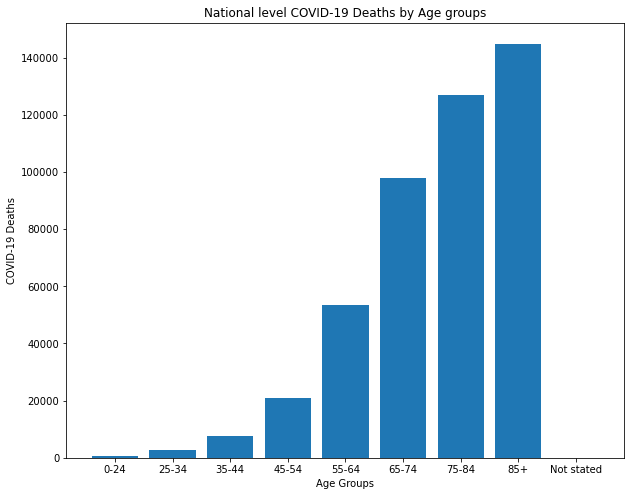

In [28]:
## plot the Age group vs Covid-19 Counts bar graph using matplotlib
## setting the appropriate title and labels for the plot. figure size helps draw larger size plots with clear information.

plt.figure(figsize=(10, 8))
plt.bar(x, y)
plt.xlabel('Age Groups')
plt.ylabel('COVID-19 Deaths')
plt.title('National level COVID-19 Deaths by Age groups')
plt.show()

## It appears that the older age groups are affected to a higher extent due to the Covid-19

# State level counts plot

In [29]:
## retrieve the subset information from the state code and counts columns for aggregated - 'All Ages' level information

x1 = covid_df_states.CTRY_State[covid_df_states.Age_Grp == 'All Ages']
y1 = covid_df_states.COVID_Deaths[covid_df_states.Age_Grp == 'All Ages']

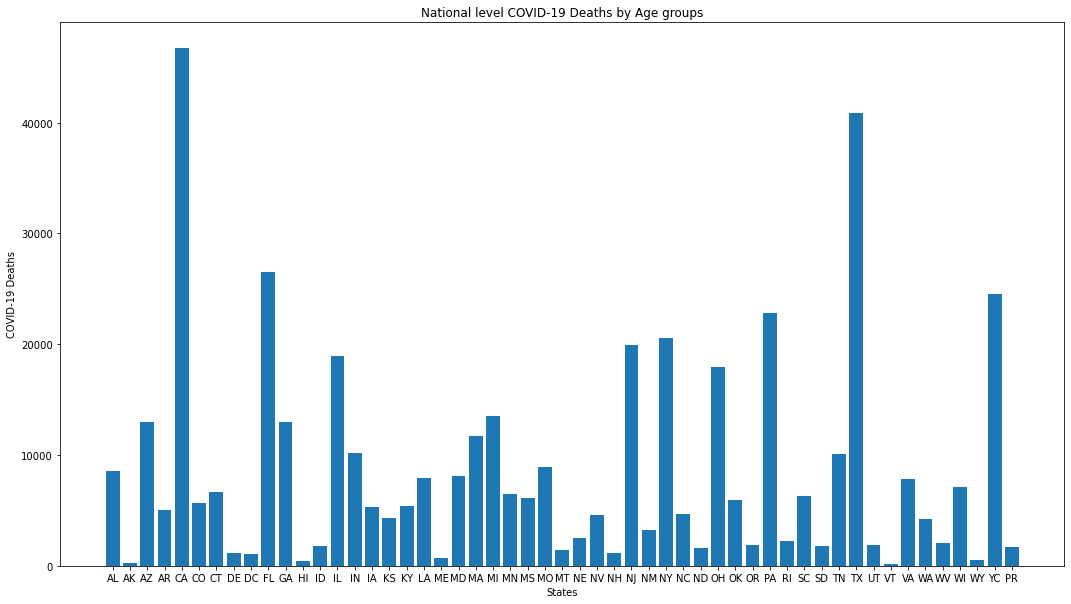

In [30]:
## plot the Age group vs Covid-19 Counts bar graph using matplotlib
## setting the appropriate title and labels for the plot. figure size helps draw larger size plots with clear information.

plt.figure(figsize=(18, 10))
plt.bar(x1, y1)
plt.xlabel('States')
plt.ylabel('COVID-19 Deaths')
plt.title('National level COVID-19 Deaths by Age groups')
plt.show()

## Looking at the above bar charts, it appears that Top 3 affected States / Regions are:

### 1) Texas (TX)
### 2) California (CA)
### 3) New York City (YC)

# Copy the the temp_df DataFrame, which has the cleaned up data, into csv. This csv file will be be used in the final milestone of the project

In [33]:
## extract only COVID-19 related information and at the summary level i.e. for 'All Ages'

load_df = covid_df_states[(covid_df_states.Age_Grp == 'All Ages') & (covid_df_states.Health_Cond_Grp == 'COVID-19')]

In [45]:
## Set Index on CTRY_State column. Reason is, we will need to add the counts from 'YC' to existing counts for 'NY'
## because both fall under State of New York. So, we need to maintain single entry.

load_csv = load_df.set_index('CTRY_State')

In [36]:
## adding the counts for 'YC' to the counts for 'NY'

load_csv['COVID_Deaths'].loc['NY'] += load_csv['COVID_Deaths'].loc['YC']

In [41]:
## reset the index once the operation above is performed. This will restore all the columns normally
load_csv = load_csv.reset_index()

In [42]:
## other than 'YC' counts records, all the records should be retained and later saved in csv

load_df = load_csv[load_csv.CTRY_State != 'YC']

In [44]:
## write the COVID-19 DataFrame in csv

load_df.to_csv("Covid_csv_data.csv", index=False)